**<center>* Assignment 4: SIMPLE LINEAR REGRESSION *</center>**

DATASCIENCE

name: GUVVALA SOMASEKHAR REDDY

mail: showmove5697@gmail.com

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as smf
import warnings
warnings.filterwarnings('ignore')

# **Problem-1)**

Delivery_time -> Predict delivery time using sorting time


Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#Solution:

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delivery_time.csv to delivery_time.csv


In [ ]:
delivery_time=pd.read_csv('delivery_time.csv')
delivery_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [ ]:
#renaming columns
delivery_time.rename(columns={'Delivery Time':"Delivery_Time","Sorting Time":"Sorting_Time"}, inplace=True)
delivery_time.head(3)

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6


##Basic operations

In [ ]:
delivery_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
delivery_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
delivery_time.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [ ]:
delivery_time.shape

(21, 2)

##Visualization of data points

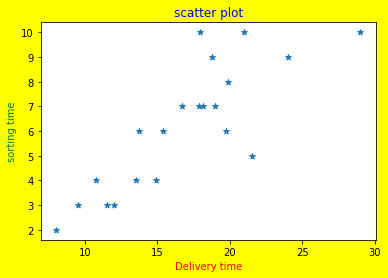

In [ ]:
#finding relationship
plt.figure(facecolor='yellow')
plt.axes()
plt.scatter(delivery_time['Delivery_Time'],delivery_time['Sorting_Time'],marker='*')
plt.title('scatter plot',color="blue")
plt.xlabel("Delivery time",color="red",size=10)
plt.ylabel("sorting time",color="green",size=10)
plt.show()

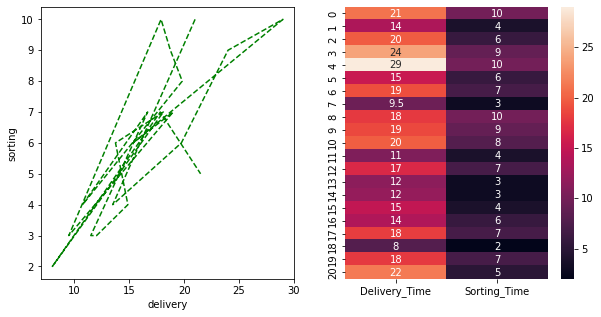

In [ ]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.plot(delivery_time['Delivery_Time'],delivery_time['Sorting_Time'],label = 'delivery',color="green",linestyle="dashed");
plt.xlabel('delivery');
plt.ylabel('sorting');
plt.subplot(1,2,2);
sns.heatmap(data=delivery_time, annot=True)
plt.show()

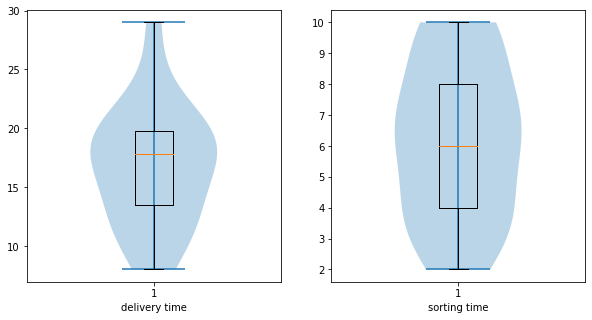

In [ ]:
#checking outliers
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.violinplot(delivery_time['Delivery_Time'])
plt.boxplot(delivery_time['Delivery_Time'])
plt.xlabel('delivery time')
plt.subplot(1,2,2);
plt.violinplot(delivery_time['Sorting_Time'])
plt.boxplot(delivery_time['Sorting_Time'])
plt.xlabel('sorting time')
plt.show()

--> No outliers in both

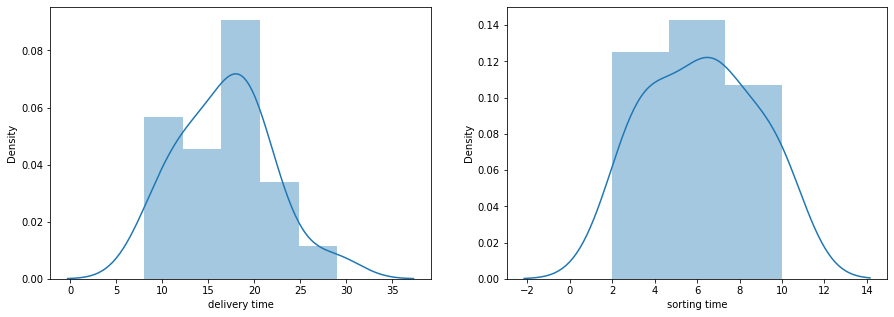

In [ ]:
#checking datapoints area
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
sns.distplot(delivery_time['Delivery_Time'])
plt.xlabel('delivery time')
plt.subplot(1,2,2);
sns.distplot(delivery_time['Sorting_Time'])
plt.xlabel('sorting time')
plt.show()




*  In delivery time:  more data is in between 10 and 20.
*  In sorting  time:  more data is in between 4 and 8.

*Both have no tails.*


##Statistics & Regression

In [ ]:
#correlation
delivery_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


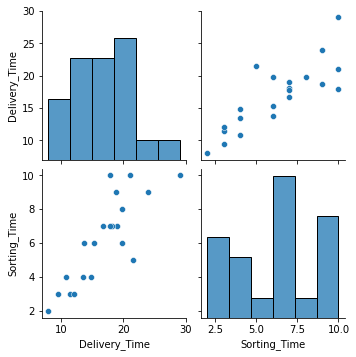

In [ ]:
sns.pairplot(delivery_time)

In [ ]:
#fitting
import statsmodels.formula.api as smf
delivery_time_model = smf.ols('Delivery_Time~Sorting_Time',data = delivery_time).fit()

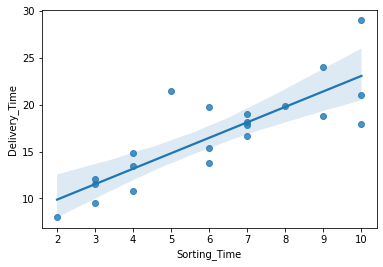

In [ ]:
#regression plot
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=delivery_time)

In [ ]:
# fitted model summary
delivery_time_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        13:55:38   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#predicting 
linear_pred = delivery_time_model.predict(delivery_time['Sorting_Time'])
linear_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [ ]:
# calucate RootMeanSquareError(rmse)
rmse_linearModel = np.sqrt(np.mean((np.array(delivery_time['Delivery_Time'])-np.array(linear_pred))**2))
rmse_linearModel

2.7916503270617654

In [ ]:
#coffients
delivery_time_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [ ]:
# t and p a values
print(delivery_time_model.tvalues,'\n' ,delivery_time_model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


In [ ]:
# model prediction
delivery_time1=(6.582734)+(1.64902)*5
delivery_time1

14.827834

In [ ]:
data_pred=pd.DataFrame(pd.Series([5,8]),columns=['Sorting_Time'])
data_pred

,Sorting_Time
0,5
1,8


In [ ]:
delivery_time_model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

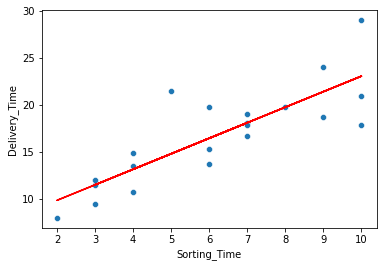

In [ ]:
#plot of best fit line in the No Transformation case
plt.plot(delivery_time.Sorting_Time,delivery_time_model.params[0]+delivery_time_model.params[1]*(delivery_time.Sorting_Time),"r")
sns.scatterplot(delivery_time.Sorting_Time,delivery_time.Delivery_Time)

## Square root Transformation

In [ ]:
x=delivery_time.Sorting_Time
y=delivery_time.Delivery_Time

delivery_time['sqt_x']=np.sqrt(x)
delivery_time['sqt_y']=np.sqrt(y)

delivery_time.head()

,Delivery_Time,Sorting_Time,log_x,log_y,sqt_x,sqt_y
0,21.00,10,2.302585,3.044522,3.162278,4.582576
1,13.50,4,1.386294,2.602690,2.000000,3.674235
2,19.75,6,1.791759,2.983153,2.449490,4.444097
3,24.00,9,2.197225,3.178054,3.000000,4.898979
4,29.00,10,2.302585,3.367296,3.162278,5.385165


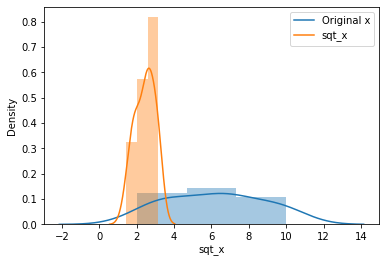

In [ ]:
#plotting
sns.distplot(x)
sns.distplot(delivery_time.sqt_x)
labels=("Original x","sqt_x")
plt.legend(labels)

In [ ]:
# Building Linear Regression Model with sqrt transfrom
delivery_time_model2=smf.ols("sqt_y~sqt_x",data=delivery_time).fit()

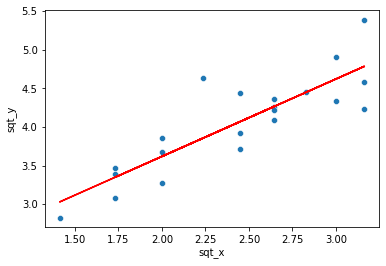

In [ ]:
#plot of best fit line in the sqrt Transformation case
plt.plot(delivery_time.sqt_x,delivery_time_model2.params[0]+delivery_time_model2.params[1]*(delivery_time.sqt_x),"r")
sns.scatterplot(delivery_time.sqt_x,delivery_time.sqt_y)

In [ ]:
delivery_time_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sqt_y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           8.48e-07
Time:                        17:00:12   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6135      0.349      4.628      0.000       0.884       2.343
sqt_x          1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log transfomation

In [ ]:
x=delivery_time.Sorting_Time
y=delivery_time.Delivery_Time

delivery_time['log_x']=np.log(x)
delivery_time['log_y']=np.log(y)
delivery_time.head()

,Delivery_Time,Sorting_Time,log_x,log_y
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [ ]:
# Building Linear Regression Model log_y with log_x
delivery_time_model3=smf.ols("log_y~log_x",data=delivery_time).fit()

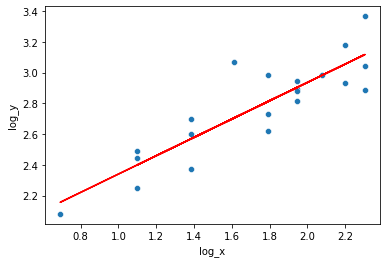

In [ ]:
#plot of best fit line in the LOG Transformation case
plt.plot(delivery_time.log_x,delivery_time_model3.params[0]+delivery_time_model3.params[1]*(delivery_time.log_x),"r")
sns.scatterplot(delivery_time.log_x,delivery_time.log_y)

In [ ]:
delivery_time_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                        13:55:39   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7420      0.133     13.086      0.000       1.463       2.021
log_x          0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#conclusion:

In [ ]:
# comparing above 3 models
test_data={'Model':pd.Series(['linearModel without Transformation','square root Transformation','Log Transformation']),
     'R Squared':pd.Series([delivery_time_model.rsquared,delivery_time_model2.rsquared,delivery_time_model3.rsquared]),
     'adjR Squared':pd.Series([delivery_time_model.rsquared_adj,delivery_time_model2.rsquared_adj,delivery_time_model3.rsquared_adj])}

test_table=pd.DataFrame(test_data)
test_table

,Model,R Squared,adjR Squared
0,linearModel without Transformation,0.682271,0.665549
1,square root Transformation,0.729201,0.714949
2,Log Transformation,0.772161,0.760170


**conclusion:** Out of three models the log transformation model is giving best accuracy.

 **i.e. 76%**

# **Question-2)**
Salary_hike -> Build a prediction model for Salary_hike

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

#solution:

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [ ]:
salary_data=pd.read_csv('Salary_Data.csv')
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


##Basic operations

In [ ]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
salary_data.shape

(30, 2)

##Visualisation of Data points

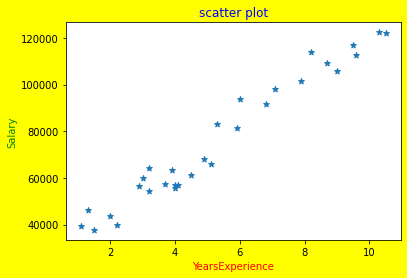

In [ ]:
#finding relationship
plt.figure(facecolor='yellow')
plt.axes()
plt.scatter(salary_data['YearsExperience'],salary_data['Salary'],marker='*')
plt.title('scatter plot',color="blue")
plt.xlabel("YearsExperience",color="red",size=10)
plt.ylabel("Salary",color="green",size=10)
plt.show()

observation: The reationship between yearexperience and salary is linear.

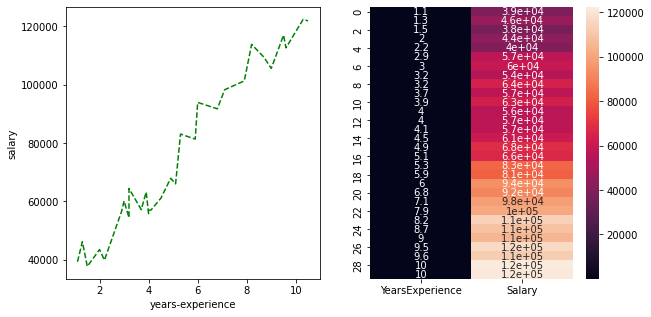

In [ ]:
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.plot(salary_data['YearsExperience'],salary_data['Salary'],label = 'salary',color="green",linestyle="dashed");
plt.xlabel('years-experience');
plt.ylabel('salary');
plt.subplot(1,2,2);
sns.heatmap(data=salary_data, annot=True)
plt.show()

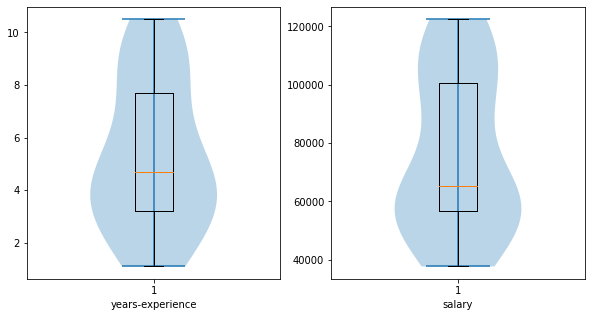

In [ ]:
#checking outliers
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.violinplot(salary_data['YearsExperience'])
plt.boxplot(salary_data['YearsExperience'])
plt.xlabel('years-experience')
plt.subplot(1,2,2);
plt.violinplot(salary_data['Salary'])
plt.boxplot(salary_data['Salary'])
plt.xlabel('salary')
plt.show()

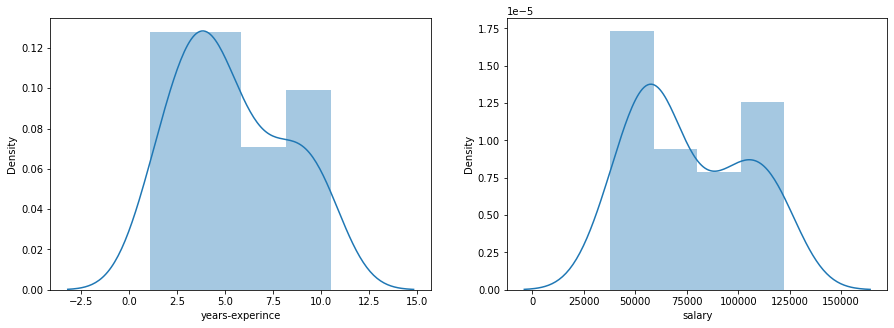

In [ ]:
#checking datapoints area
plt.figure(figsize=(15,5));
plt.subplot(1,2,1);
sns.distplot(salary_data['YearsExperience'])
plt.xlabel('years-experince')
plt.subplot(1,2,2);
sns.distplot(salary_data['Salary'])
plt.xlabel('salary')
plt.show()

*  In years experince: more data is in between 1 and 7.
*  In sorting time: more data is in between 45000 and 100000.

Both have no tails.

## Statistics & Regression

In [ ]:
#correlation
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


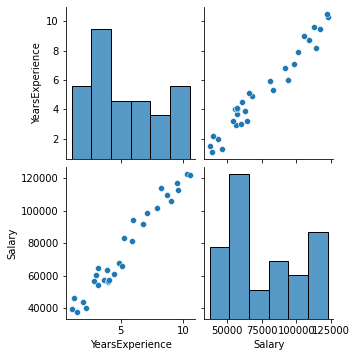

In [ ]:
#pairplot
sns.pairplot(salary_data)

In [ ]:
#fitting
import statsmodels.formula.api as smf
salary_model = smf.ols('Salary~YearsExperience',data = salary_data).fit()

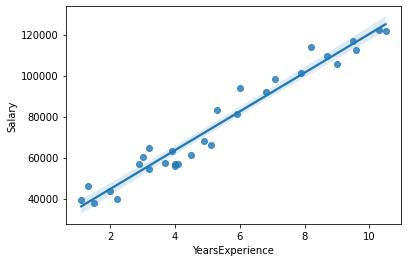

In [ ]:
#regression plot
sns.regplot(x="YearsExperience", y="Salary", data=salary_data)

In [ ]:
# fitted model summary
salary_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        13:56:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#coefficients
salary_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [ ]:
# t and p a values
print(salary_model.tvalues,'\n' ,salary_model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [ ]:
# model prediction
salary_hike=(25792.200199)+(9449.962321)*3
salary_hike

54142.087162

In [ ]:
salary_data_pred=pd.DataFrame(pd.Series([5,8]),columns=['YearsExperience'])
salary_data_pred

,YearsExperience
0,5
1,8


In [ ]:
salary_model.predict(salary_data_pred)

0     73042.011806
1    101391.898770
dtype: float64

## Transformation with log 

In [ ]:
x=salary_data['YearsExperience']
y=salary_data.Salary

salary_data['log_x']=np.log(x)
salary_data['log_y']=np.log(y)

salary_data.head()

,YearsExperience,Salary,log_x,log_y
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


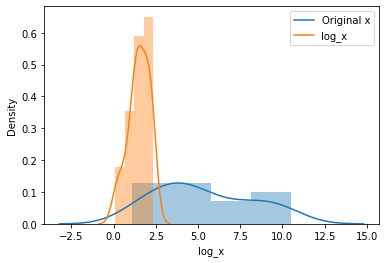

In [ ]:
#plotting
sns.distplot(x)
sns.distplot(salary_data.log_x)
labels=("Original x","log_x")
plt.legend(labels)

In [ ]:
# Building Linear Regression Model with log_x
salary_model2=smf.ols("log_y~log_x",data=salary_data).fit()

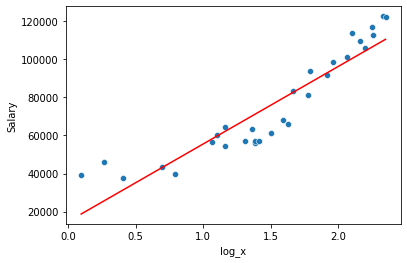

In [ ]:
#plot of best fit line in the LOG Transformation case
plt.plot(salary_data.log_x,salary_model2.params[0]+salary_model2.params[1]*(salary_data.log_x),"r")
sns.scatterplot(salary_data.log_x,salary_data.Salary)

In [ ]:
salary_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  log_y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           7.40e-16
Time:                        14:39:16   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3280      0.056    184.868      0.000      10.214      10.442
log_x          0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Boxcox Transformation 

In [ ]:
#BOXCOX TRANSFORMATION of x and y
x=salary_data['YearsExperience']
y=salary_data.Salary

bc_x=stats.boxcox(x)
bc_x=list(bc_x)
bc_x.pop()
bc_x=bc_x[0]
salary_data["bc_x"]=bc_x

bc_y=stats.boxcox(y)
bc_y=list(bc_y)
bc_y.pop()
bc_y=bc_y[0]
salary_data["bc_y"]=bc_y

salary_data.head()

,YearsExperience,Salary,log_x,log_y,bc_x,bc_y
0,1.1,39343.0,0.095310,10.580073,0.097408,15.936022
1,1.3,46205.0,0.262364,10.740843,0.278674,16.285303
2,1.5,37731.0,0.405465,10.538237,0.445296,15.845799
3,2.0,43525.0,0.693147,10.681091,0.814970,16.155010
4,2.2,39891.0,0.788457,10.593906,0.948515,15.965914


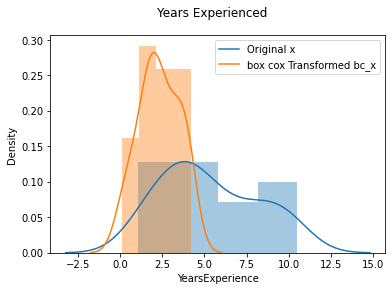

In [ ]:
# boxcox Transformed Data plot
plt.suptitle("Years Experienced")
sns.distplot(x)
sns.distplot(bc_x)
labels=("Original x","box cox Transformed bc_x")
plt.legend(labels)

In [ ]:
# Linear Regression Model
salary_model3=smf.ols("bc_x~bc_x",data=salary_data).fit()

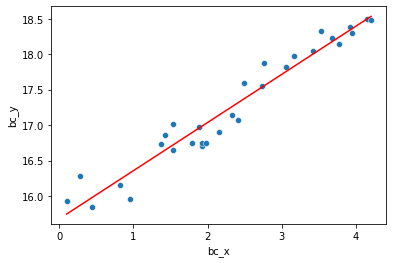

In [ ]:
# fitting line in the BOXCOX Transformation plot
plt.plot(salary_data.bc_x,salary_model3.params[0]+salary_model3.params[1]*(salary_data.bc_x),"r")
sns.scatterplot(salary_data.bc_x,salary_data.bc_y)

In [ ]:
salary_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   bc_y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     458.2
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           6.78e-19
Time:                        15:53:46   Log-Likelihood:                 6.2928
No. Observations:                  30   AIC:                            -8.586
Df Residuals:                      28   BIC:                            -5.783
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6821      0.082    190.282      0.000      15.513      15.851
bc_x           0.6776      0.032     21.406      0.000       0.613       0.742
==============================================================================
Omnibus:                        0.955   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.620   Jarque-Bera (JB):                0.852
Skew:                           0.159   Prob(JB):                        0.653
Kurtosis:                       2.238   Cond. No.                         6.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#conclusion:

In [ ]:
# comparing above 3 models
test_data={'Model':pd.Series(['linearModel without Transformation','log Transformation','Boxcox  Transformation']),
     'R Squared':pd.Series([salary_model3.rsquared,salary_model2.rsquared,salary_model3.rsquared]),
     'adjR Squared':pd.Series([salary_model.rsquared_adj,salary_model2.rsquared_adj,salary_model3.rsquared_adj])}
     
test_table=pd.DataFrame(test_data)
test_table

,Model,R Squared,adjR Squared
0,linearModel without Transformation,0.942411,0.955419
1,log Transformation,0.942411,0.940354
2,Boxcox Transformation,0.942411,0.940354


**Conclusion:** Out of these three models the original model is giving best accuracy

**i.e.95%**



---

                                                                  THANK YOU



---



